In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [3]:
imre = pd.read_csv('ARISML.csv', index_col = 'ts')
luca = pd.read_csv('recording_luca.csv', index_col = 'ts')
imre.shape

(240, 27)

In [4]:
luca.shape

(15007, 27)

In [5]:
combined = pd.concat([luca,imre]).drop_duplicates().reset_index()

In [6]:
combined = combined.set_index('ts').sort_index().reset_index()
combined = combined[combined['ts'] > 0]
combined['Origin'] = 0

In [7]:
origin_imre = combined.merge(imre)['ts'].values

In [8]:
def set_origin(row):
    return 'Imre' if row['ts'] in origin_imre else 'Luca'

In [9]:
combined['Origin'] = combined.apply(set_origin, axis = 1)

In [10]:
combined['Time [s]'] = combined['ts']/1000
combined['Altitude [m]'] = combined['altitude']/1000
combined['Battery [V]'] = combined['battery_battery']/1000
combined['Pressure [kPa]'] = combined['sb_data_pressure']/1000

In [11]:
combined.columns

Index(['ts', 'sb_data_pressure', 'sb_data_temp', 'sb_data_gyro_x',
       'sb_data_gyro_y', 'sb_data_gyro_z', 'sb_data_acc_x', 'sb_data_acc_y',
       'sb_data_acc_z', 'battery_battery', 'battery_current',
       'battery_consumption', 'gps_hour', 'gps_minute', 'gps_second',
       'gps_satellite', 'gps_lat_deg', 'gps_lat_decimal', 'gps_lon_deg',
       'gps_lon_decimal', 'gps_fix', 'gps_HDOP', 'gps_altitude', 'altitude',
       'velocity', 'airbrake_extension [%]', 'flight_phase', 'cs', 'Origin',
       'Time [s]', 'Altitude [m]', 'Battery [V]', 'Pressure [kPa]'],
      dtype='object')

In [12]:
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

In [13]:
combined.set_index('ts').to_csv('maiden_launch_combined_telemetry.csv')

In [14]:
#convert to gs
fmt_acc = lambda x: x / 1024
#convert to degrees per second
fmt_gyro = lambda x: x / 16.4

combined[dim3('Acceleration')] = combined[dim3('sb_data_acc')].apply(pd.to_numeric).apply(fmt_acc)
combined[dim3('Gyro')] = combined[dim3('sb_data_gyro')].apply(pd.to_numeric).apply(fmt_gyro)

In [15]:
combined['Time diff [ms]'] = (combined['Time [s]'] - combined['Time [s]'].shift(1)) * 1000

(2400, 2570)

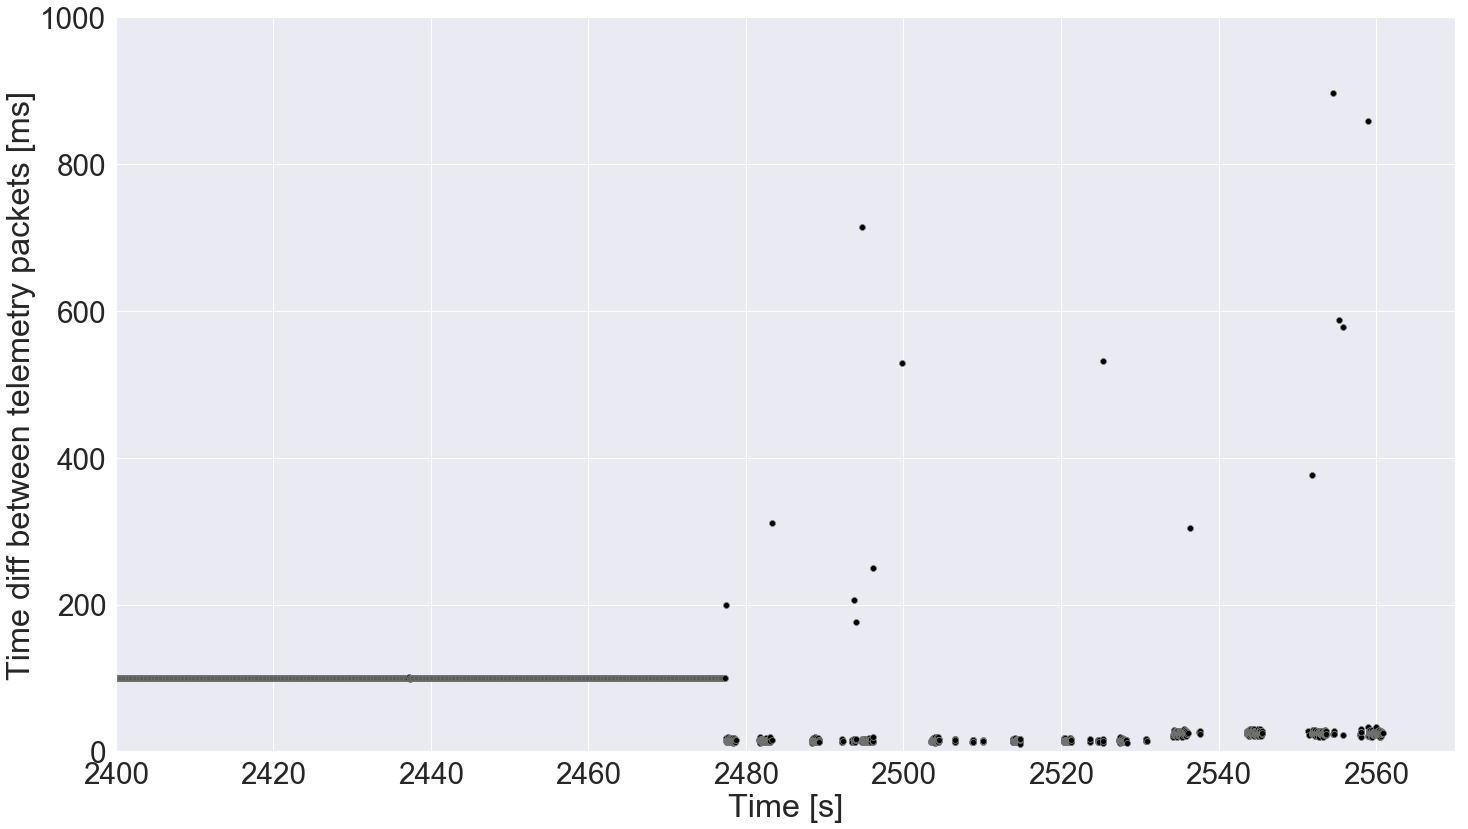

In [16]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Time diff [ms]', color = 'black', edgecolor='gray')#, hue = 'Origin', s=150)
plt.set_ylabel('Time diff between telemetry packets [ms]')
plt.set_xlabel('Time [s]')
plt.set_ylim(0, 1000)
plt.set_xlim(2400, 2570)

Text(0.5,0,'Time [s]')

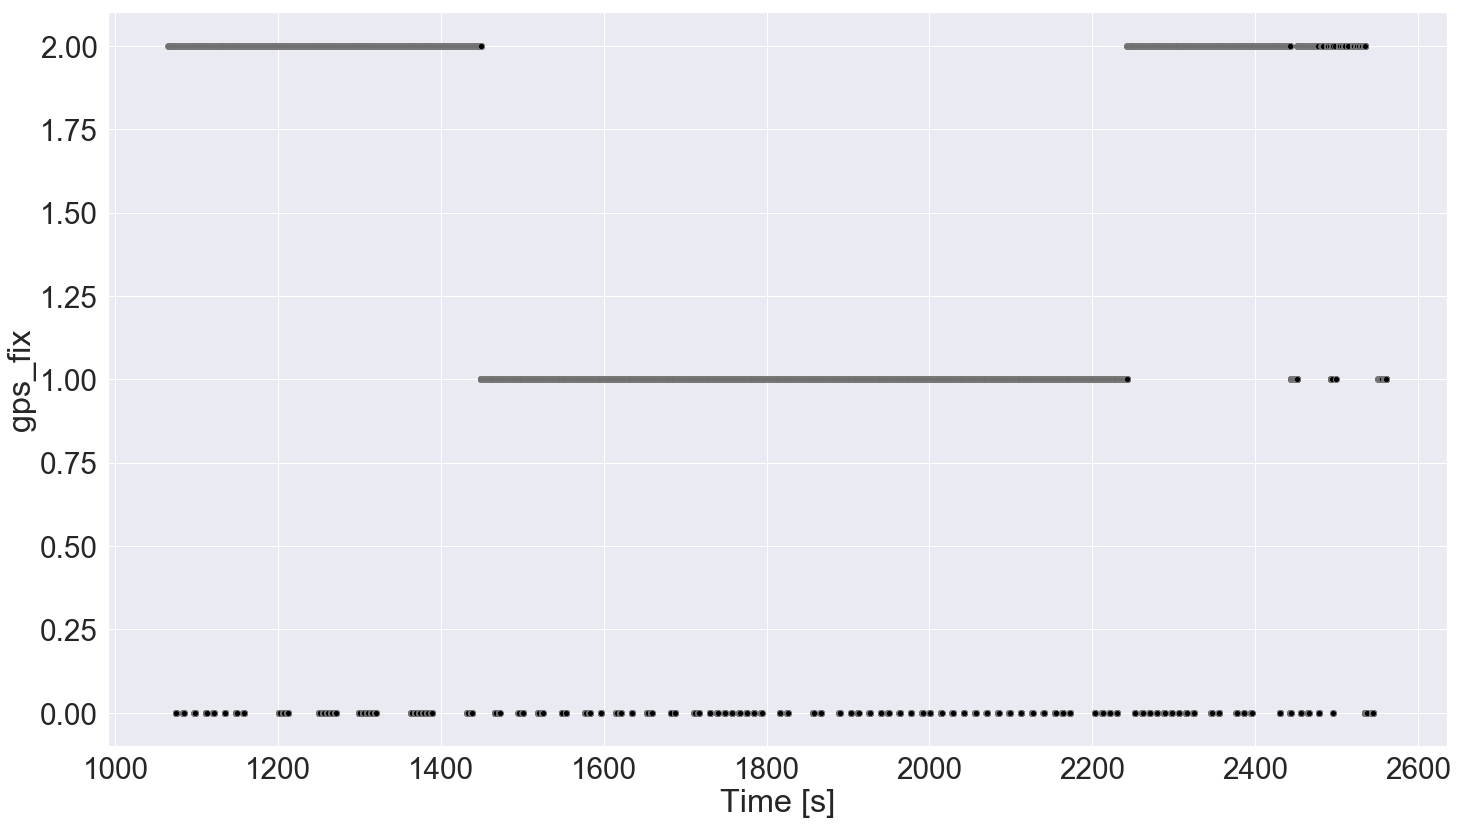

In [17]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'gps_fix', color = 'black', edgecolor='gray')#, hue = 'Origin', s=150)

plt.set_xlabel('Time [s]')
#plt.set_xlim(2500, 2570)

(2500, 2570)

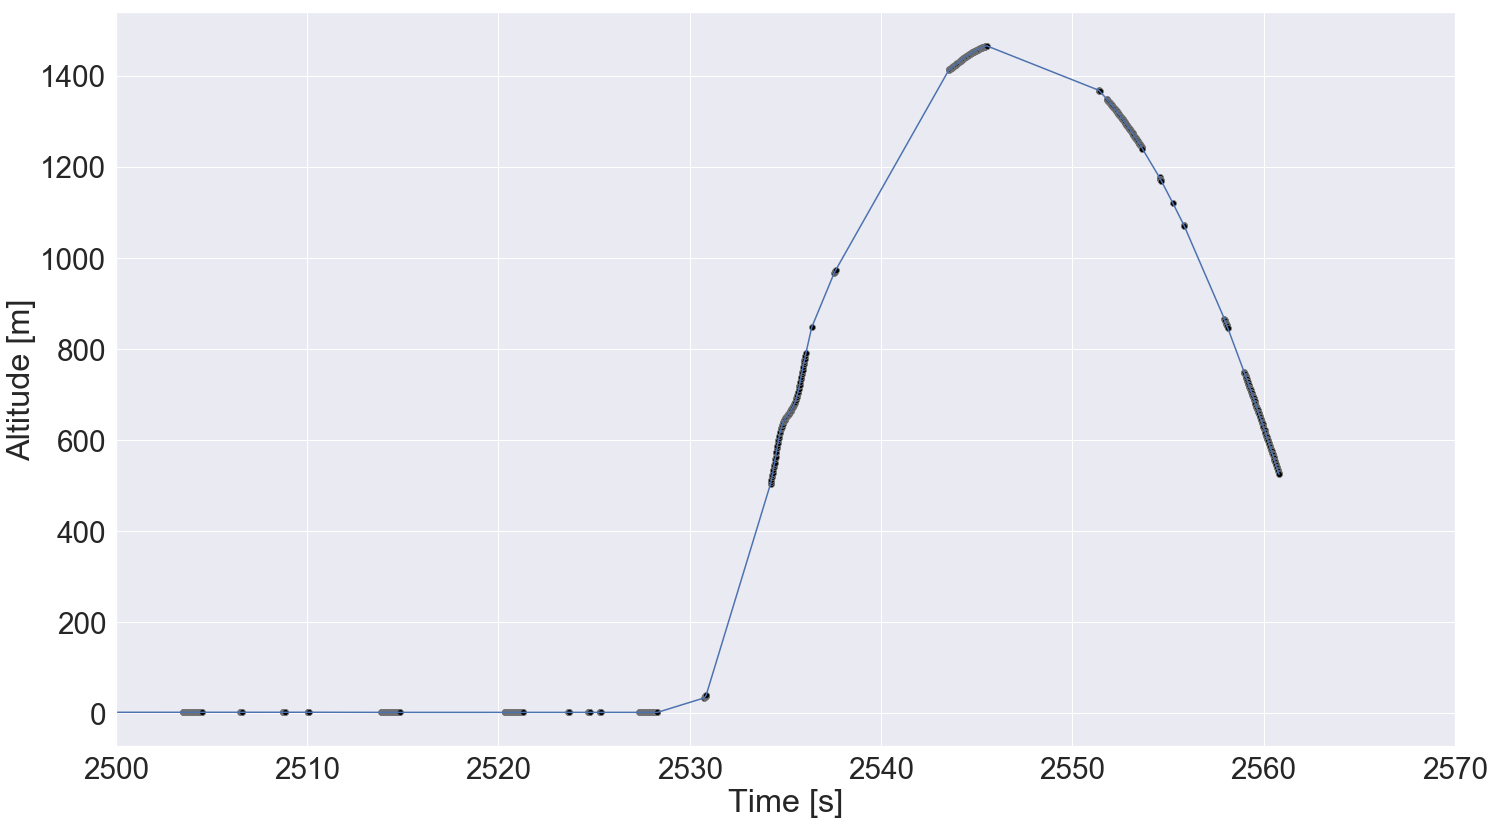

In [18]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Altitude [m]', color = 'black', edgecolor='gray')#, hue = 'Origin', s=150)
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Altitude [m]')
plt.set_ylabel('Altitude [m]')
plt.set_xlabel('Time [s]')
plt.set_xlim(2500, 2570)

(2500, 2570)

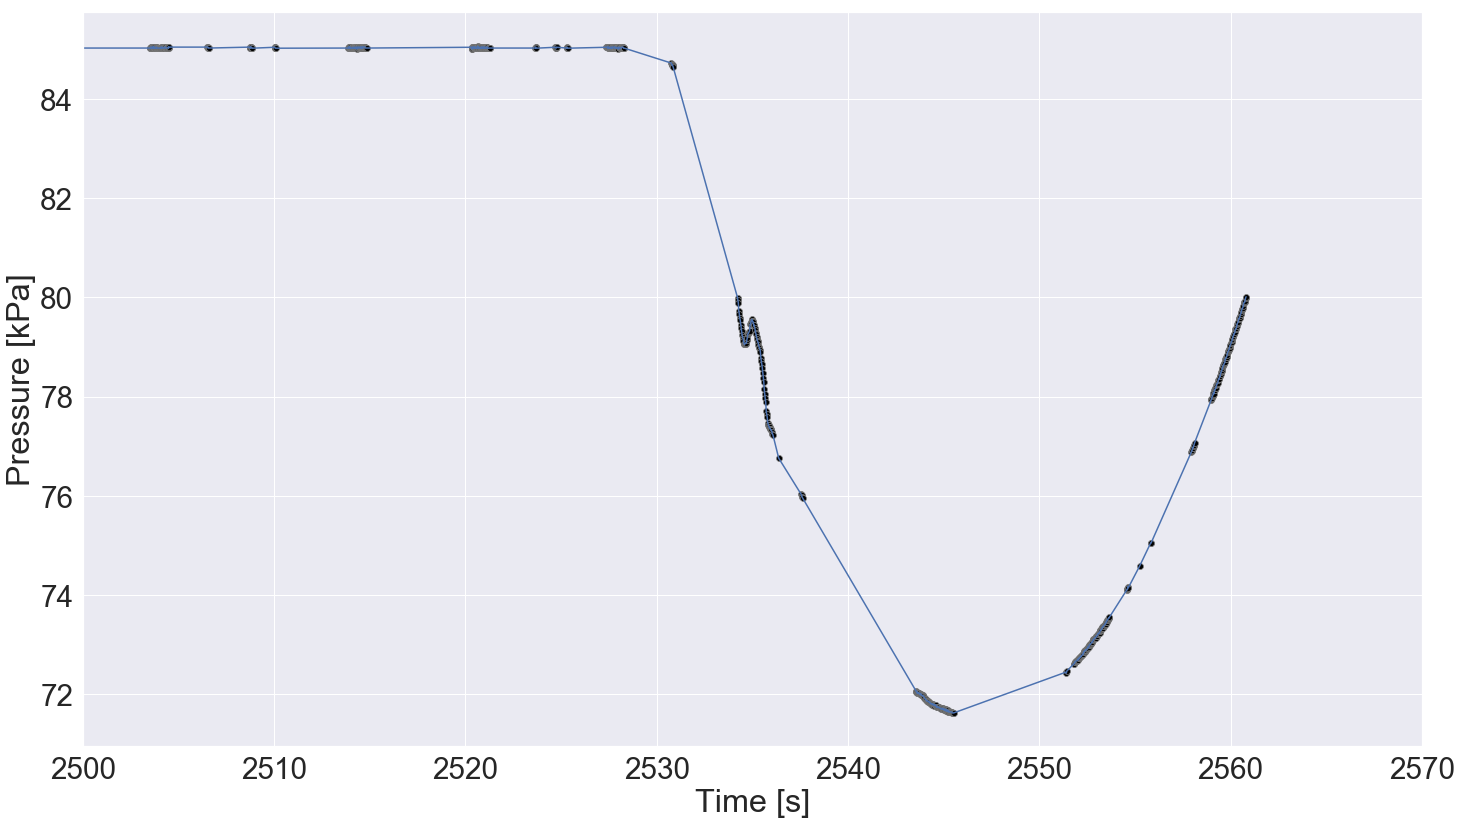

In [19]:
plt = sns.scatterplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]')
plt.set_ylabel('Pressure [kPa]')
plt.set_xlabel('Time [s]')
plt.set_xlim(2500, 2570)

(2500, 2570)

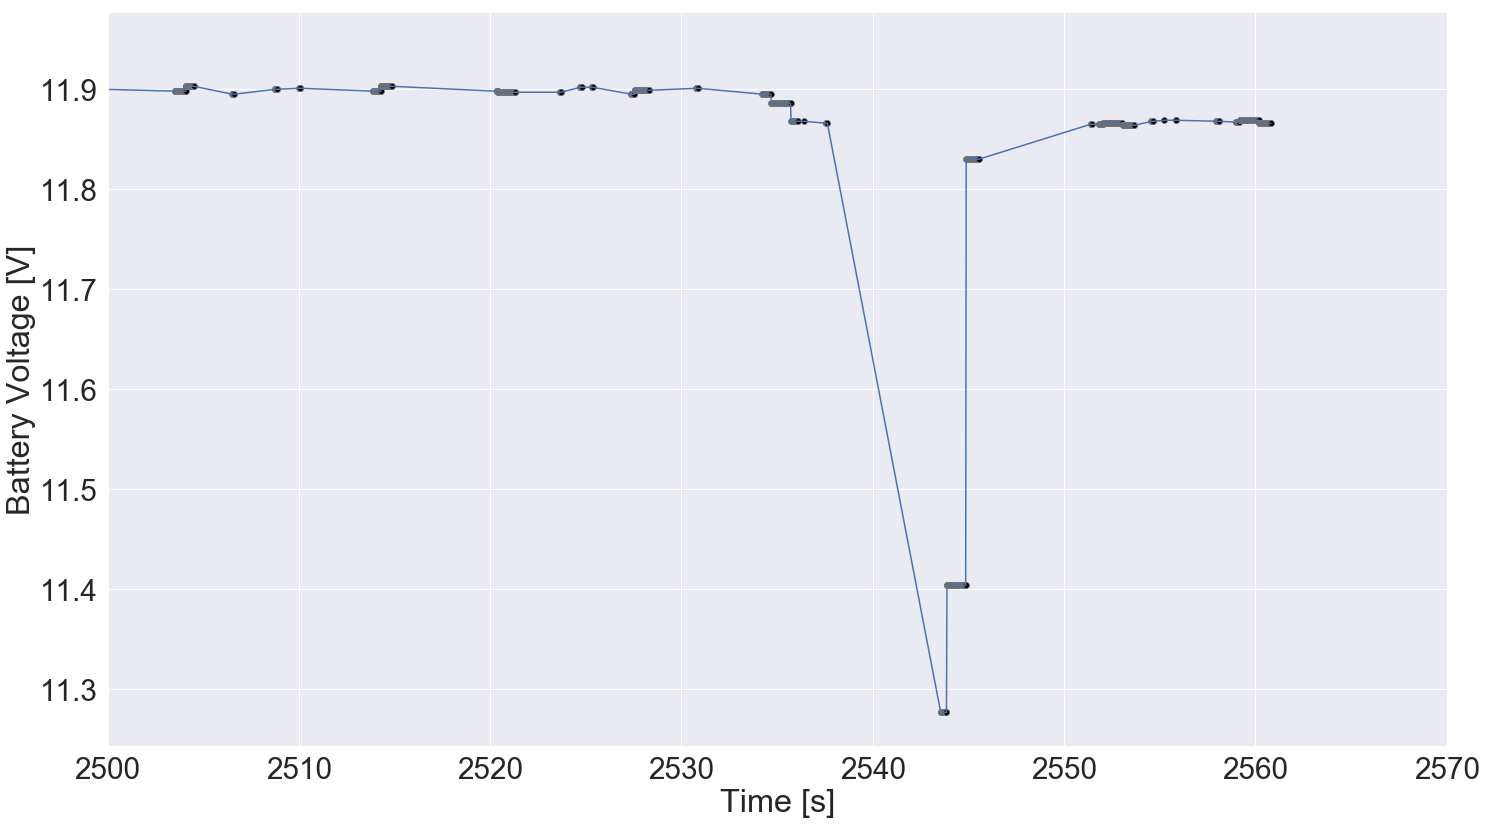

In [20]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Battery [V]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Battery [V]')
plt.set_ylabel('Battery Voltage [V]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(2500, 2570)

In [21]:
imu_log = combined.reset_index()
imu_log.index.rename('Log Entry', inplace = True)
imu_log = imu_log.reset_index()
imu_log.head()

,Log Entry,index,ts,sb_data_pressure,sb_data_temp,sb_data_gyro_x,sb_data_gyro_y,sb_data_gyro_z,sb_data_acc_x,sb_data_acc_y,...,Altitude [m],Battery [V],Pressure [kPa],Acceleration_x,Acceleration_y,Acceleration_z,Gyro_x,Gyro_y,Gyro_z,Time diff [ms]
0,0,1,1065200,85044,2972,7,-11,-17,-19,21,...,1.515,11.941,85.044,-0.018555,0.020508,1.029297,0.426829,-0.670732,-1.036585,NaN
1,1,2,1065300,85025,2972,8,-10,-10,-18,22,...,1.493,11.941,85.025,-0.017578,0.021484,1.031250,0.487805,-0.609756,-0.609756,100.0
2,2,3,1065400,85044,2972,9,-9,-24,-16,24,...,1.494,11.941,85.044,-0.015625,0.023438,1.030273,0.548780,-0.548780,-1.463415,100.0
3,3,4,1065500,85025,2972,10,-10,-22,-14,20,...,1.497,11.941,85.025,-0.013672,0.019531,1.033203,0.609756,-0.609756,-1.341463,100.0
4,4,5,1065600,85044,2972,8,-9,-17,-17,18,...,1.477,11.941,85.044,-0.016602,0.017578,1.032227,0.487805,-0.548780,-1.036585,100.0


In [22]:
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acceleration', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,sb_data_gyro_y,Altitude [m],sb_data_acc_y,battery_battery,velocity,battery_current,sb_data_gyro_x,sb_data_acc_z,Time diff [ms],Battery [V],...,battery_consumption,gps_lon_decimal,gps_HDOP,gps_hour,gps_lat_decimal,gps_lon_deg,sb_data_acc_x,Acceleration,Gyro,Axis
Log Entry,Axis,,,,,,,,,,,,,,,,,,,,,
0,x,-11,1.515,21,11941,817,343,7,1054,NaN,11.941,...,96,757284,82,11,9047751,8,-19,-0.018555,0.426829,x
1,x,-10,1.493,22,11941,810,343,8,1056,100.0,11.941,...,96,757284,82,11,9047751,8,-18,-0.017578,0.487805,x
2,x,-9,1.494,24,11941,813,343,9,1055,100.0,11.941,...,96,757284,82,11,9047751,8,-16,-0.015625,0.548780,x
3,x,-10,1.497,20,11941,814,343,10,1058,100.0,11.941,...,96,757284,82,11,9047751,8,-14,-0.013672,0.609756,x
4,x,-9,1.477,18,11941,809,343,8,1057,100.0,11.941,...,96,757284,82,11,9047751,8,-17,-0.016602,0.487805,x


(2500, 2570)

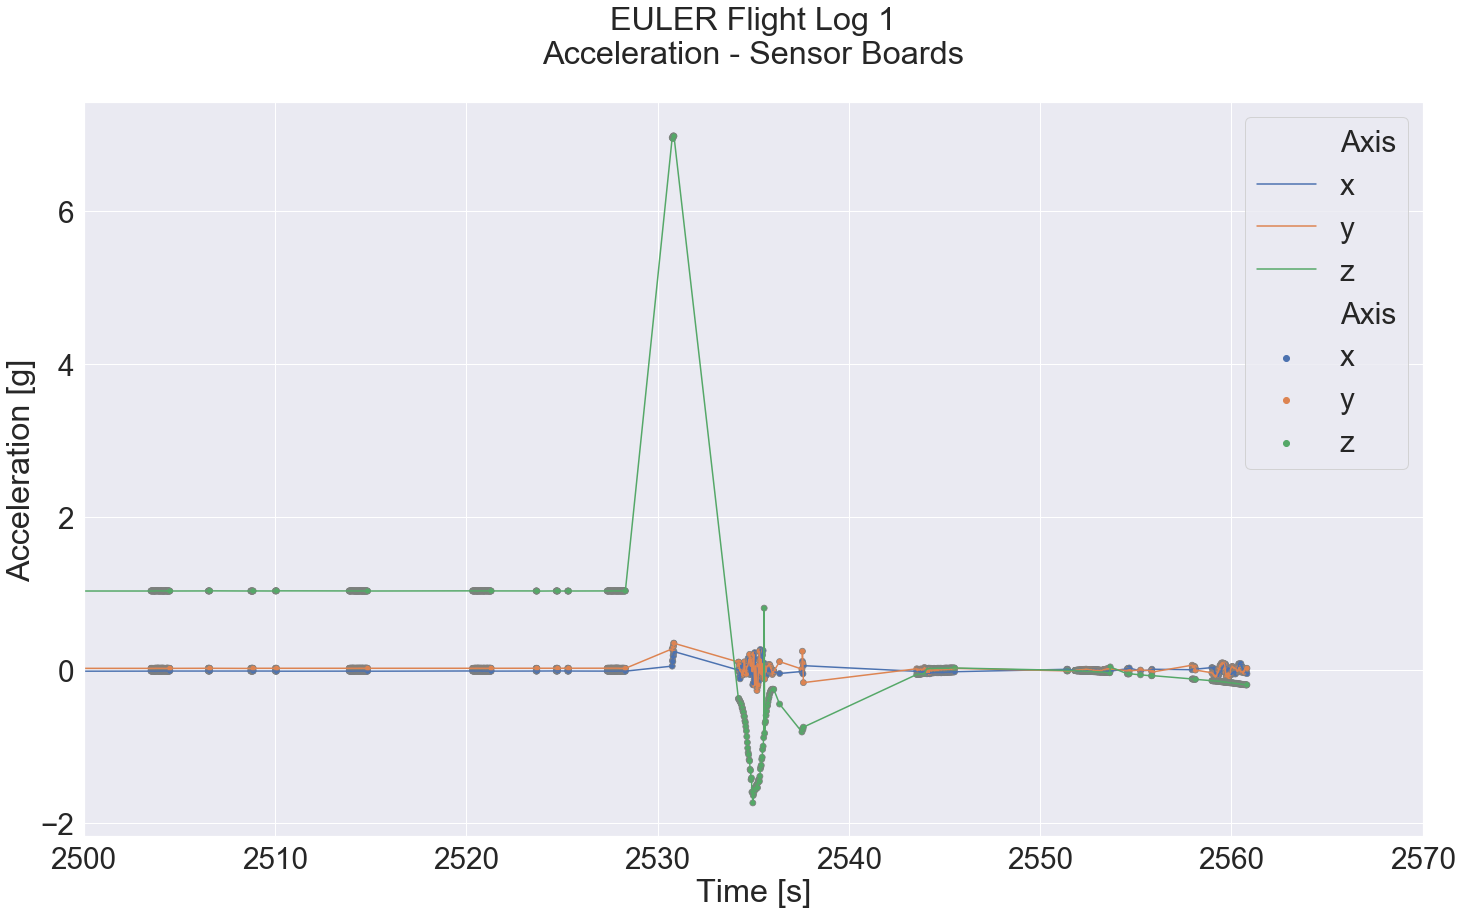

In [23]:
plt = sns.scatterplot(data = imu_log_long, x = 'Time [s]', y = 'Acceleration', hue = 'Axis', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = imu_log_long, x = 'Time [s]', y = 'Acceleration', hue = 'Axis')
plt.set_title(f'EULER Flight Log 1\nAcceleration - Sensor Boards\n')
plt.set_ylabel('Acceleration [g]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(2500, 2570)

(2500, 2570)

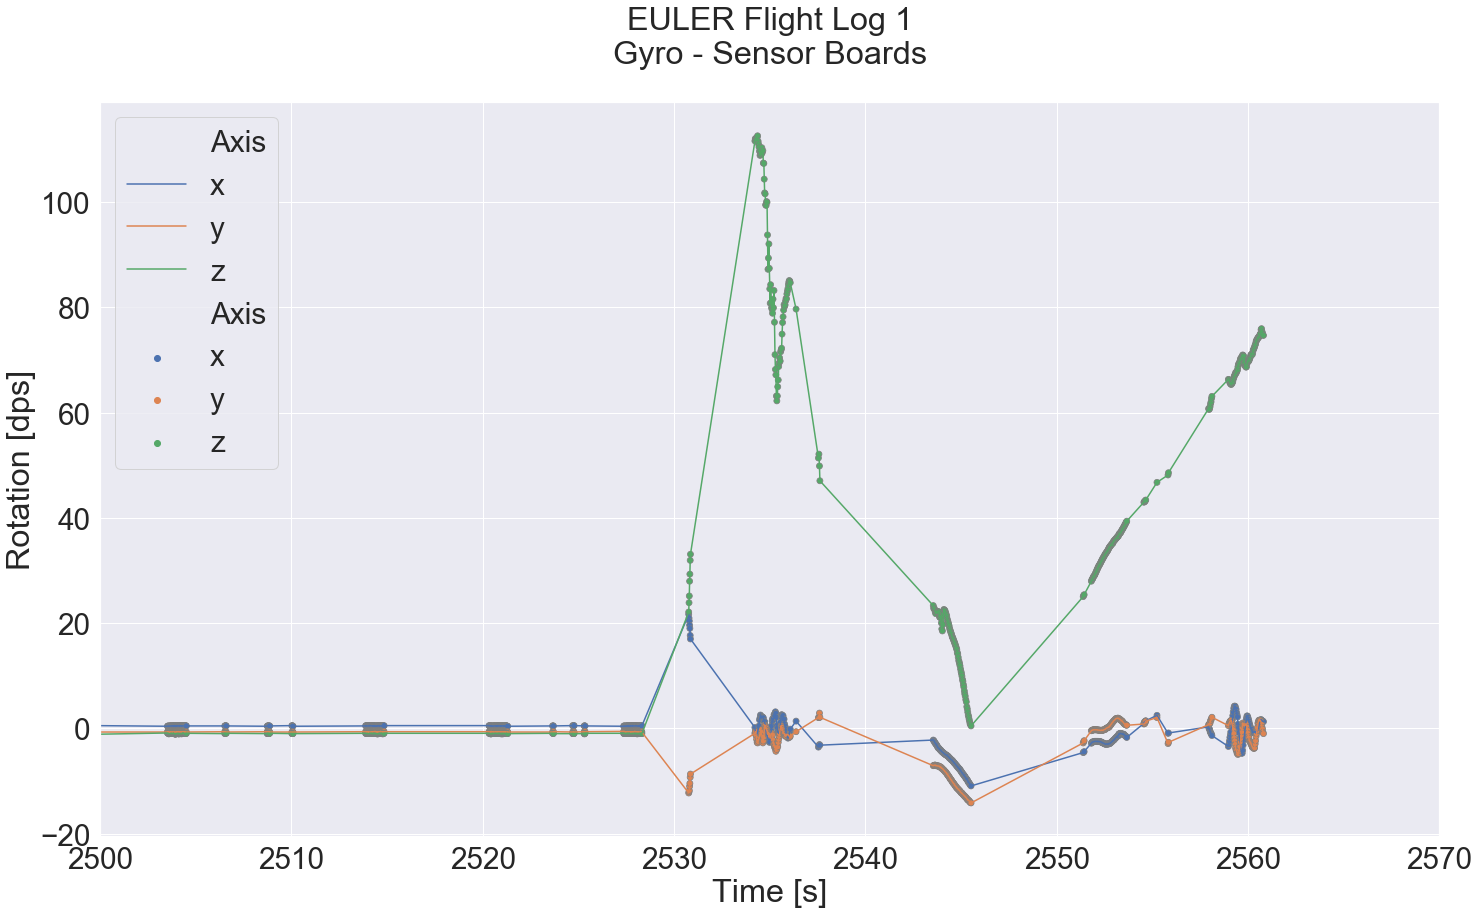

In [24]:
plt = sns.scatterplot(data = imu_log_long, x = 'Time [s]', y = 'Gyro', hue = 'Axis', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = imu_log_long, x = 'Time [s]', y = 'Gyro', hue = 'Axis')
plt.set_title(f'EULER Flight Log 1\nGyro - Sensor Boards\n')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(2500, 2570)